# CUSTOMER CHURN PREDICTION

### 1. Load the data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import shap

In [6]:
# Loading the dataset
data = pd.read_csv("Churn_Modelling.csv")

### 2. Data Cleaning

In [7]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [8]:
data.duplicated().sum()

0

In [9]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 3. Data Preparation and Visualization

In [10]:
pd.DataFrame(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
# Encoding categorical variables
label_encoder_geography = LabelEncoder()
label_encoder_gender = LabelEncoder()
data['Geography'] = label_encoder_geography.fit_transform(data['Geography'])
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

<Figure size 1000x800 with 0 Axes>

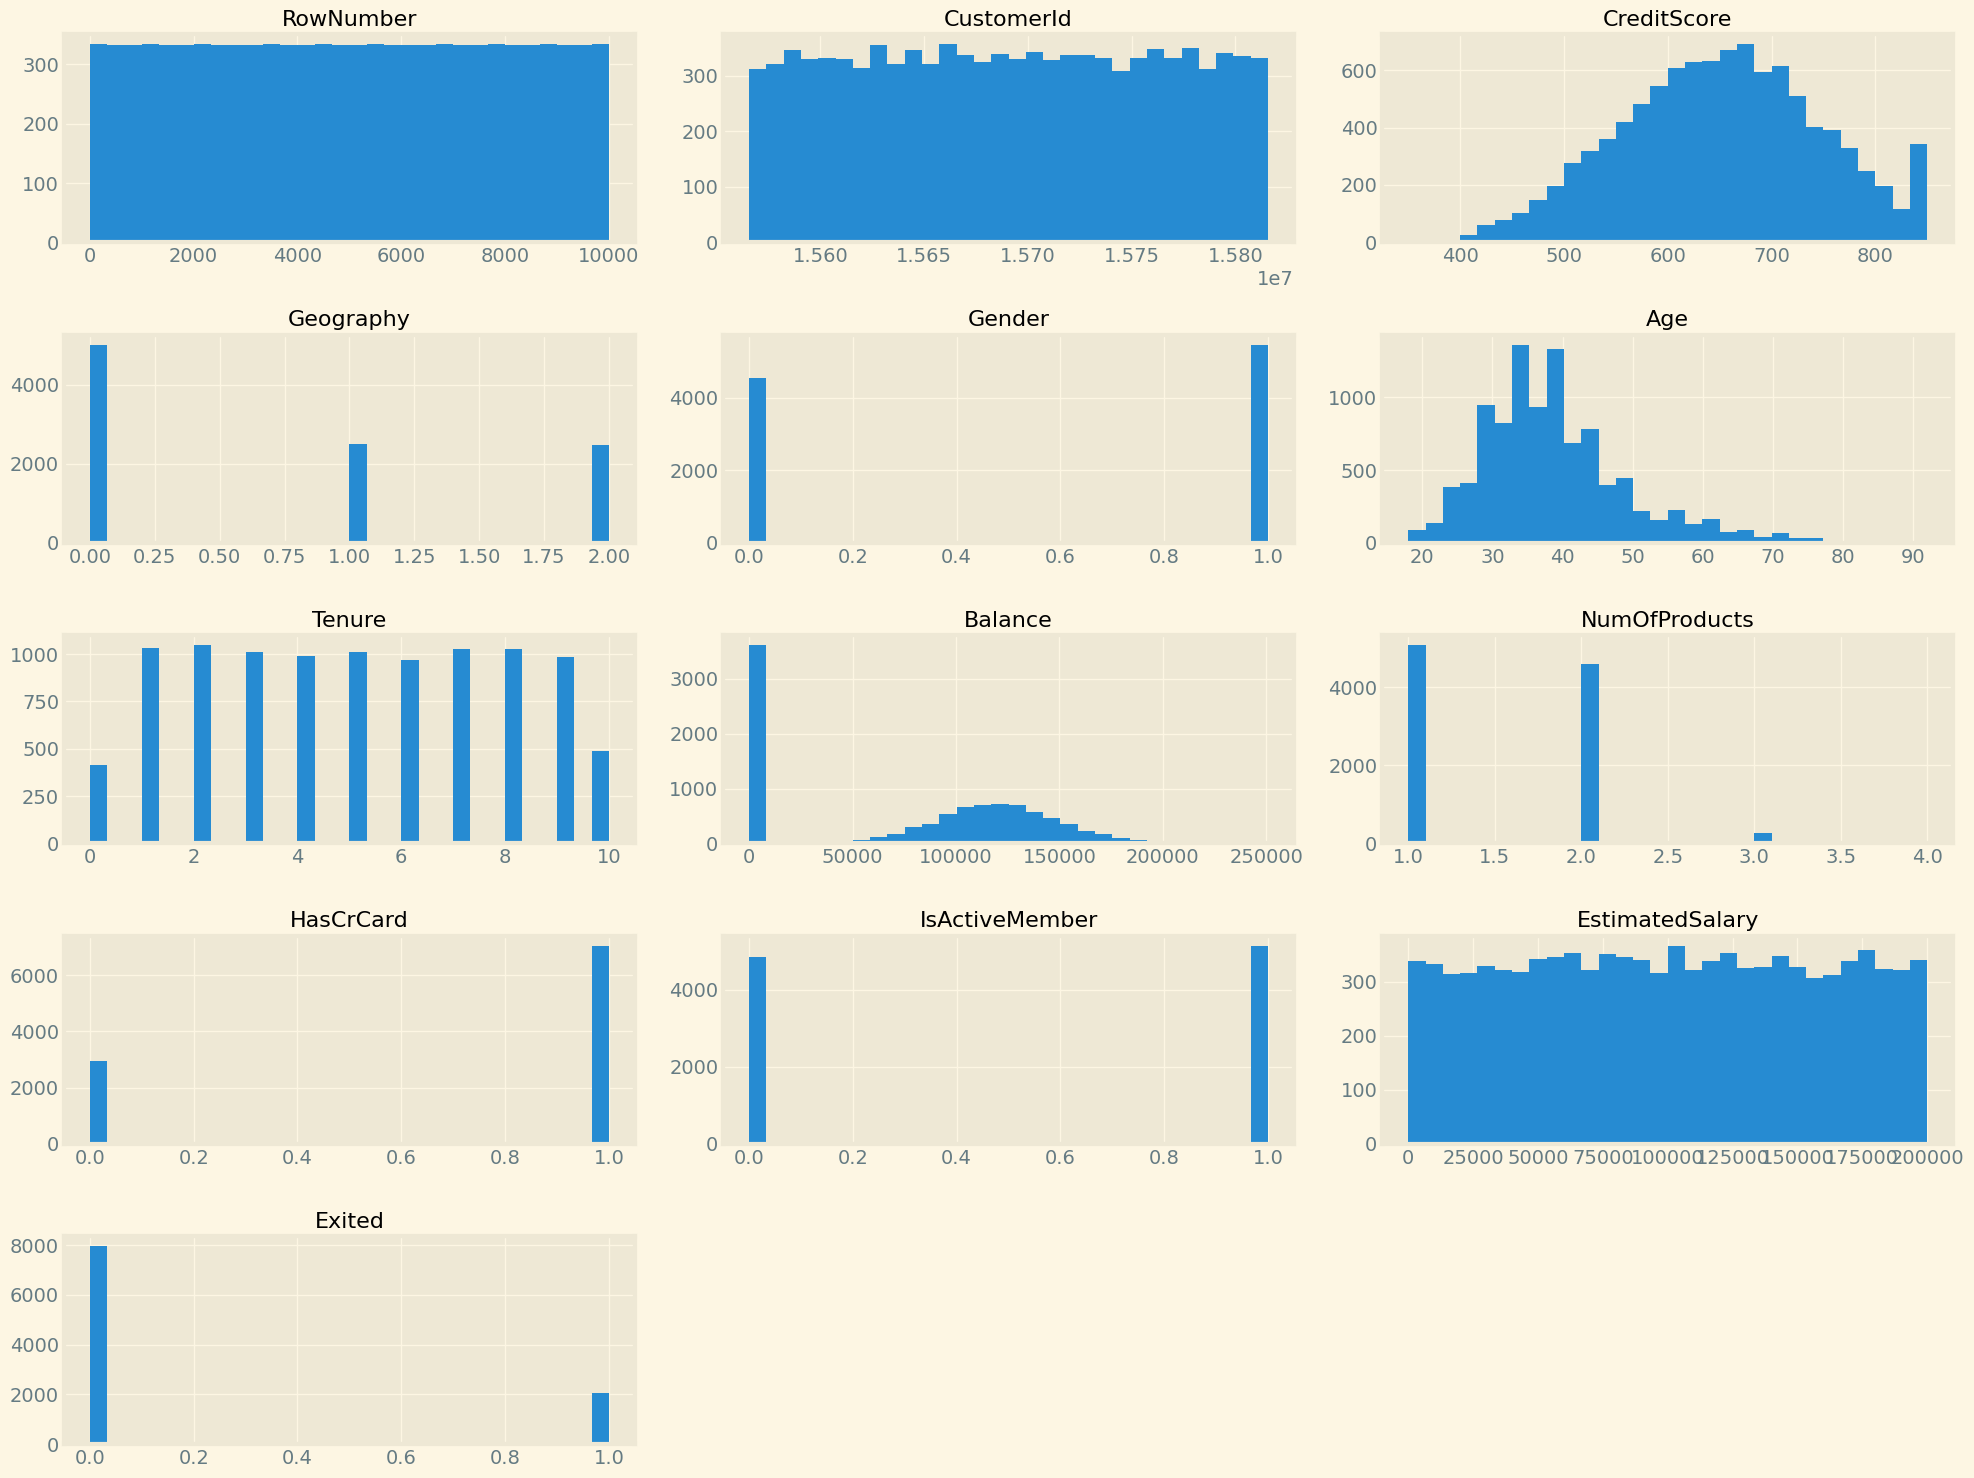

In [26]:
# Visualizing the distribution of numerical features
plt.figure(figsize=(10, 8))
plt.style.use("Solarize_Light2")
data.hist(bins=30, figsize=(20, 15), layout=(5, 3))
plt.tight_layout()
plt.show()

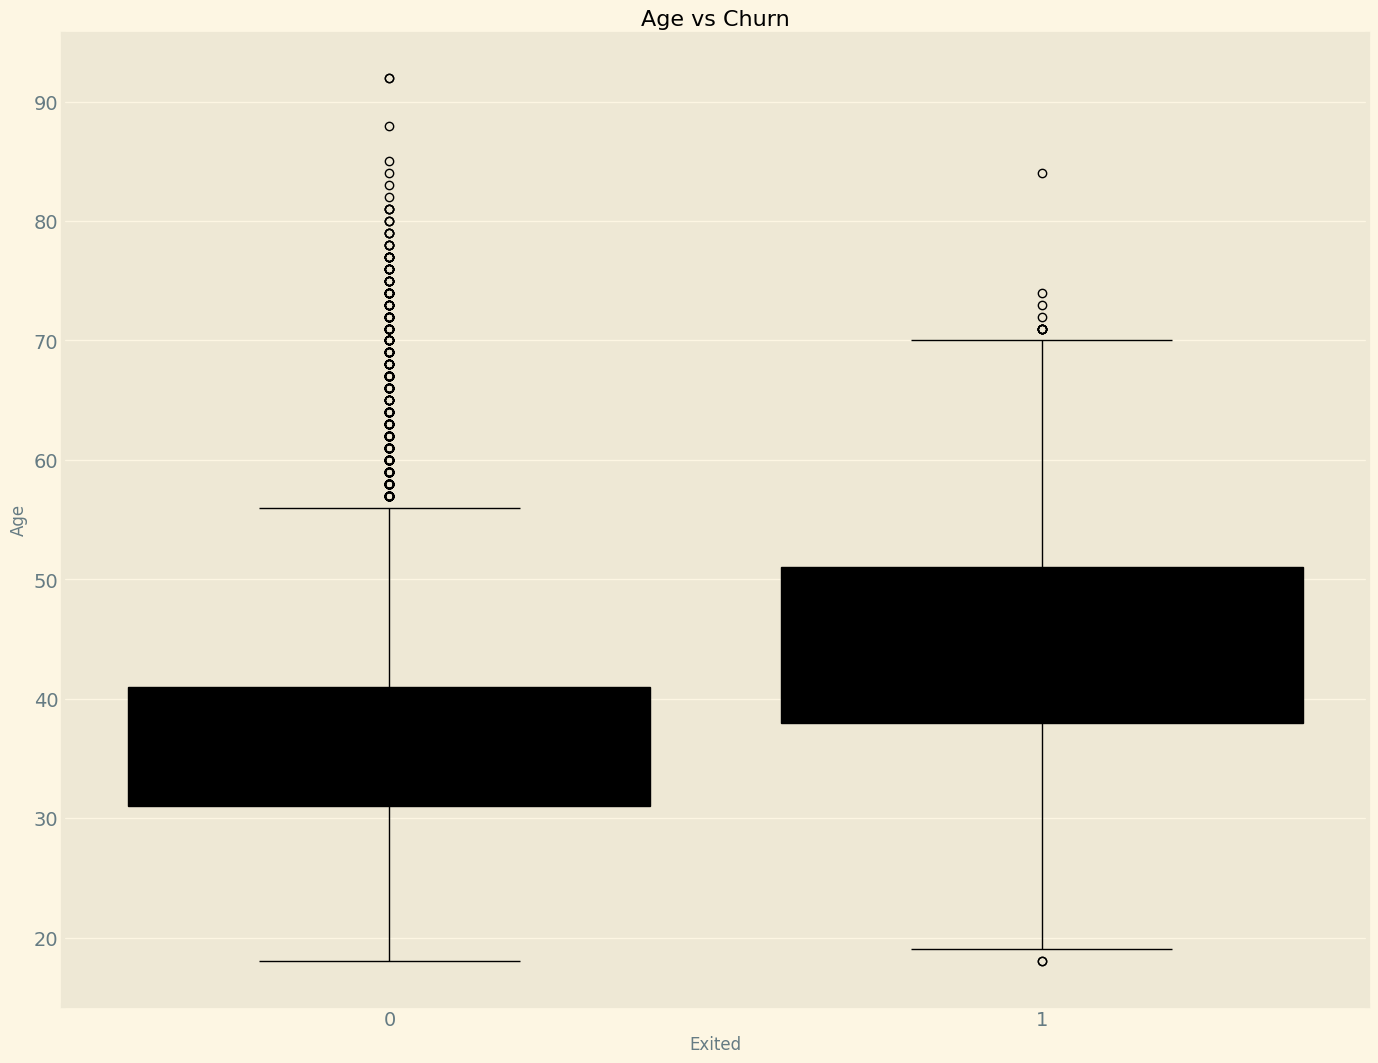

In [27]:
# Visualizing the relationship between features and the target variable
plt.figure(figsize=(15, 12))
sns.boxplot(x='Exited', y='Age', data=data, color="black")
plt.title('Age vs Churn')
plt.show()

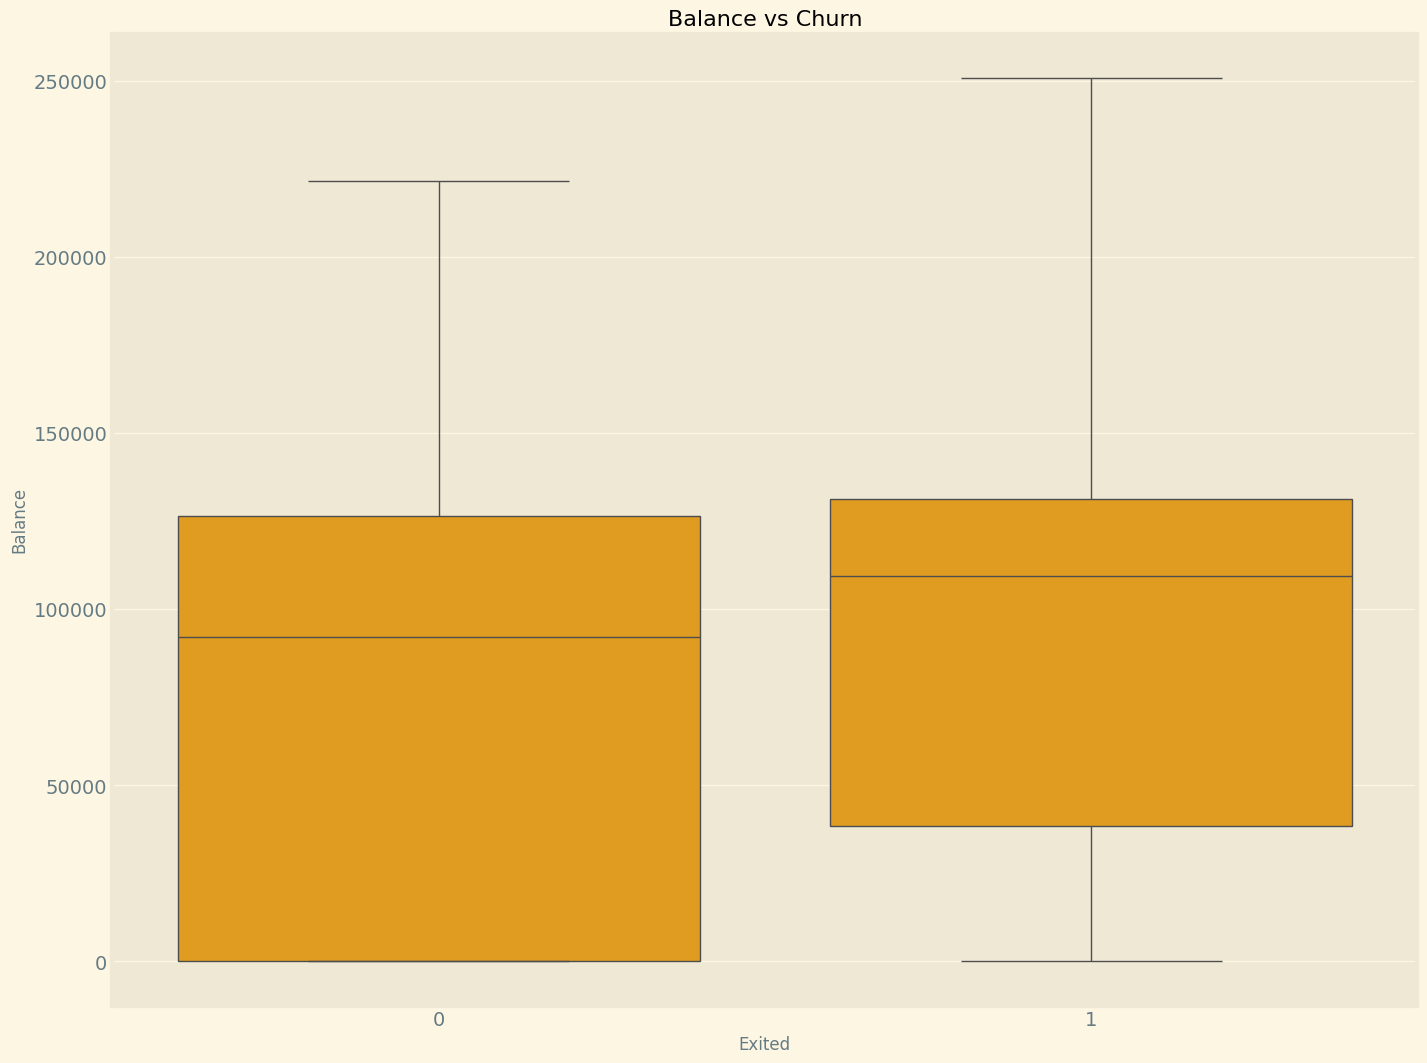

In [28]:
plt.figure(figsize=(15, 12))
sns.boxplot(x='Exited', y='Balance', data=data, color="orange")
plt.title('Balance vs Churn')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

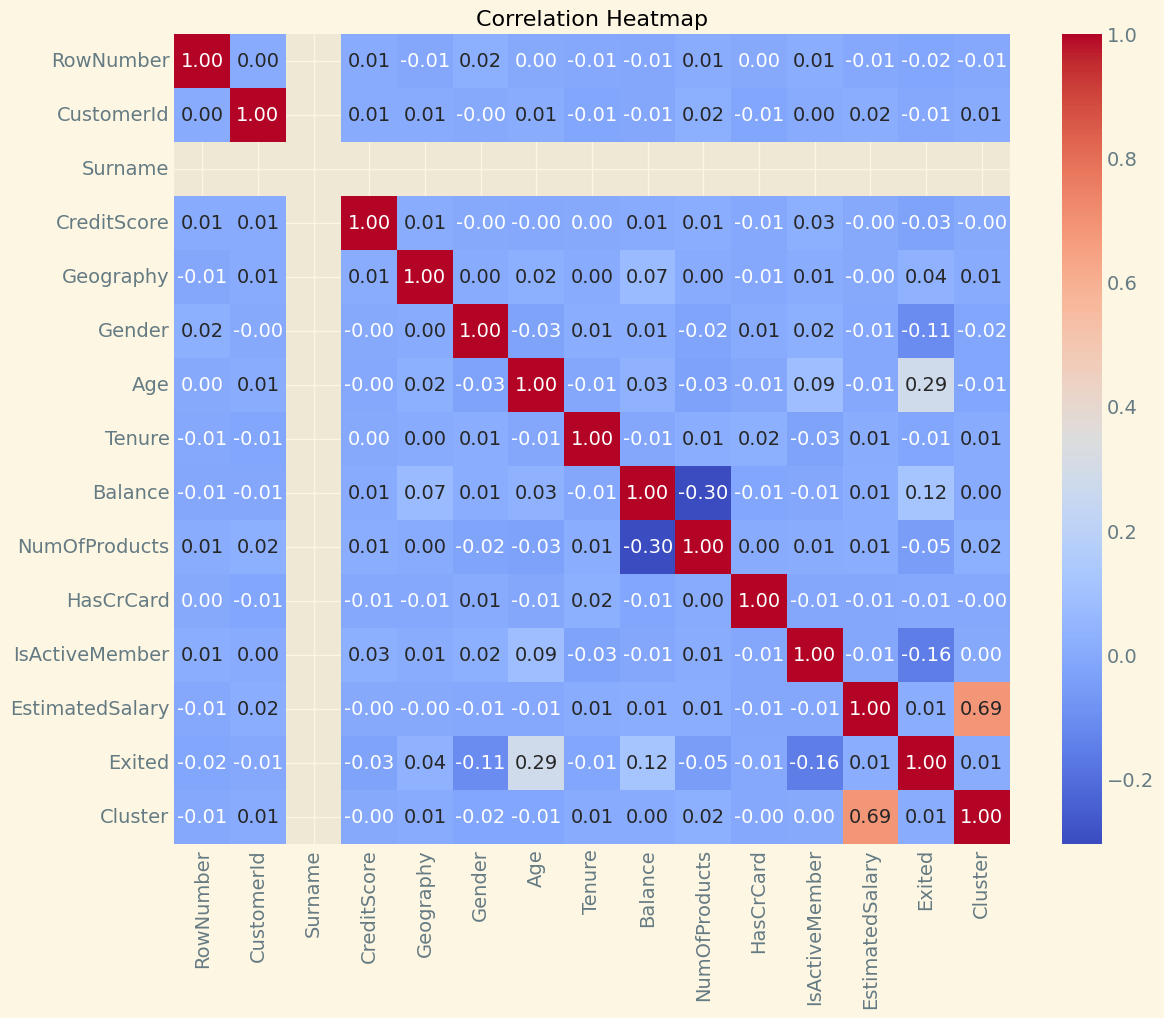

In [39]:
numeric_data = data.apply(pd.to_numeric, errors='coerce')

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')

In [29]:
# Selecting features and target
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = data['Exited']

In [17]:
X, y

(      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0             619          0       0   42       2       0.00              1   
 1             608          2       0   41       1   83807.86              1   
 2             502          0       0   42       8  159660.80              3   
 3             699          0       0   39       1       0.00              2   
 4             850          2       0   43       2  125510.82              1   
 ...           ...        ...     ...  ...     ...        ...            ...   
 9995          771          0       1   39       5       0.00              2   
 9996          516          0       1   35      10   57369.61              1   
 9997          709          0       0   36       7       0.00              1   
 9998          772          1       1   42       3   75075.31              2   
 9999          792          0       0   28       4  130142.79              1   
 
       HasCrCard  IsActiveMember  Esti

In [20]:
# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Model Evaluation

In [21]:
# Initializing the models
log_reg = LogisticRegression(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
grad_boost = GradientBoostingClassifier(random_state=42)

In [22]:
# Training the models
log_reg.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [23]:
# Cross-validation
cv_log_reg = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='f1')
cv_rand_forest = cross_val_score(rand_forest, X_train, y_train, cv=5, scoring='f1')
cv_grad_boost = cross_val_score(grad_boost, X_train, y_train, cv=5, scoring='f1')

In [24]:
# Predicting on test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rand_forest = rand_forest.predict(X_test)
y_pred_grad_boost = grad_boost.predict(X_test)

In [30]:
# Evaluating models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [31]:
# Logistic Regression
log_reg_results = evaluate_model(y_test, y_pred_log_reg)
log_reg_results
# Random Forest
rand_forest_results = evaluate_model(y_test, y_pred_rand_forest)
rand_forest_results
# Gradient Boosting
grad_boost_results = evaluate_model(y_test, y_pred_grad_boost)
grad_boost_results

(0.8655, 0.7540983606557377, 0.4681933842239186, 0.5777080062794349)

In [32]:
from sklearn.metrics import roc_auc_score

y_prob_rand_forest = rand_forest.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob_rand_forest)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.8566917002744039


### 5. Implement Cross-Validation

In [35]:
# Displaying cross-validation scores
cv_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Cross-Validation F1 Score': [cv_log_reg.mean(), cv_rand_forest.mean(), cv_grad_boost.mean()]
})
print(cv_results)

                 Model  Cross-Validation F1 Score
0  Logistic Regression                   0.273435
1        Random Forest                   0.571018
2    Gradient Boosting                   0.571800


In [34]:
# Displaying evaluation results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [log_reg_results[0], rand_forest_results[0], grad_boost_results[0]],
    'Precision': [log_reg_results[1], rand_forest_results[1], grad_boost_results[1]],
    'Recall': [log_reg_results[2], rand_forest_results[2], grad_boost_results[2]],
    'F1 Score': [log_reg_results[3], rand_forest_results[3], grad_boost_results[3]]
})
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression    0.8150   0.596639  0.180662  0.277344
1        Random Forest    0.8640   0.746939  0.465649  0.573668
2    Gradient Boosting    0.8655   0.754098  0.468193  0.577708


### 6. Customer Segmentation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

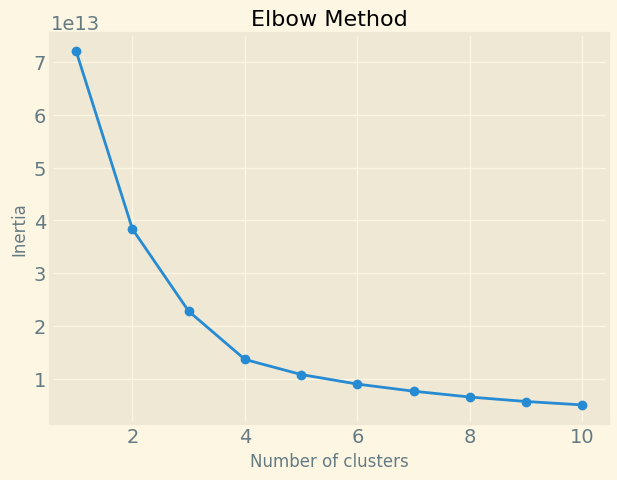

In [40]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()